<a href="https://colab.research.google.com/github/PersGraphics/kmeans/blob/main/Practica_3_0_KMEANS_Def.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Realizar estudios exploratorios de los datos usando análisis cluster y empleando el algoritmo de Kmeans o K-medias. Para ello habrá que:
* Preprocesar los datos. En esta etapa 
se seleccionarán las variables que sean relevantes, detectará
los outliers y observaciones relevantes.
* Análisis cluster. Se determinará cuántos grupos significativos se pueden encontrar en los datos y
se calcularán.
* Realizar una descripción semántica de los patrones encontrados. analizando la importancia de
cada grupo y analizando la importancia de las variables en su definición, para ello hay que
realizar una descripción estadística de los grupos encontrados.


# **1. SEGMENTACION DE CLIENTES**
* En el dataset se encuentran datos relativos a clientes de un centro comercial (género, edad,
ingresos anuales, puntuación de gasto (asignada por el centro comercial))
* El objetivo es categorizar los clientes

In [156]:
#Importación de librerías necesarias

import seaborn as sns # Creación de mapa de calor
import pandas as pd # Pandas para datset
import matplotlib.pyplot as plt # Necesario para reajustar el tamaño del heatMap o crear otros graficos
import pydot # Imagen del arbol de decisiones u otras imagenes
import numpy as np # Libreria numpy, util en python

from sklearn.preprocessing import MinMaxScaler # Escalamiento de características
from sklearn import preprocessing # Preprocesamiento de datos
from sklearn.cluster import KMeans # Algoritmo de clustering
from sklearn.mixture import GaussianMixture # Modelado probabilístico
from mpl_toolkits.mplot3d import Axes3D # Gráficos en 3D

df_clientes = pd.read_csv('/content/drive/MyDrive/KMEANS/Mall_Customers.csv') 

In [157]:
# Preprocesamiento y elección de variables relevantes para el estudio.
# Se deberá realizar un pequeño análisis estadístico y argumentar qué variables se eligen para el estudio
df_clientes.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [158]:
df_clientes.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [159]:
 # Codificamos las columnas con valores string reetiquetandolos con valores numericos, de esta manera podemos utilizar los modelos adecuadamente
le = preprocessing.LabelEncoder() 
df_clientes['Gender'] = le.fit_transform(df_clientes.Gender.values)

In [160]:
df_clientes.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [161]:
# Columna (datos) irrelevantes
df_clientes = df_clientes.drop('CustomerID', axis=1)

In [162]:
# Escalamiento y detección de outliers

# Argumentar si es necesario o no realizar escalamiento de las variables, y, si es necesario,
# escalarlas.
# Se debe escalar porque, la edad es entre 0-100, y el dinero es 0 y 1000, mejor normalizar entre 0 y 1 para que no haya una gran difenrecia
scaler = MinMaxScaler()
scaler.fit(df_clientes)

df_clientes_scaled = scaler.transform(df_clientes)

df= pd.DataFrame(df_clientes_scaled, columns=df_clientes.columns)

In [163]:
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,0.400962,0.373443,0.502041
std,0.497633,0.268635,0.215285,0.263505
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.206731,0.217213,0.344388
50%,0.000000,0.346154,0.381148,0.500000
75%,1.000000,0.596154,0.516393,0.734694
max,1.000000,1.000000,1.000000,1.000000


In [164]:
# Detectar los outliers y eliminarlos

# Utilizando el método de Jacknife en el que ejecutaremos el algoritmo K-means
# eliminando una observación cada vez.
X = df.to_numpy()

N= X.shape[0]  # Numero de observaciones
K= 4 # Número de clusters

SSE = []

# Almacenaremos el índice SSE de cada una de las ejecuciones en un vector. Esa
# información se puede obtener con la variable inertia_ del modelo.

for i in range(0, N):
  X_sin_i = np.delete(X, i, axis=0)
  # Aplicamos K-medias a X_sin_i y obtenemos el indice SSE 
  kmeans = KMeans(n_clusters=K, n_init=10, random_state=100).fit(X_sin_i)
  SSE.append(kmeans.inertia_)

# Detección analítica de outliers
sigma = np.std(SSE) # Desviación típica de SSE
mu= np.mean(SSE) # Media

# Umbral: 2 para distribuciones normales
# Umbral: 3 para cualquier otra distribución
umbral = 2

outliers = []
for i in range(0, N):
  if np.abs(SSE[i]-mu) >  umbral*sigma:
    outliers.append(i)

for idx in outliers:
  print("Outlier encontrado en el indice: ", idx)
  print("Valor columna: ", df.iloc[idx, :])
  print("Valor SSE: ", SSE[idx] ,"\n")

# Eliminar outliers del DataFrame
df_no_outliers = df.drop(outliers)

Outlier encontrado en el indice:  0
Valor columna:  Gender                    1.000000
Age                       0.019231
Annual Income (k$)        0.000000
Spending Score (1-100)    0.387755
Name: 0, dtype: float64
Valor SSE:  22.09226755161599 

Outlier encontrado en el indice:  2
Valor columna:  Gender                    0.000000
Age                       0.038462
Annual Income (k$)        0.008197
Spending Score (1-100)    0.051020
Name: 2, dtype: float64
Valor SSE:  21.880031865766192 

Outlier encontrado en el indice:  134
Valor columna:  Gender                    1.000000
Age                       0.038462
Annual Income (k$)        0.475410
Spending Score (1-100)    0.040816
Name: 134, dtype: float64
Valor SSE:  21.993661121809723 

Outlier encontrado en el indice:  138
Valor columna:  Gender                    1.000000
Age                       0.019231
Annual Income (k$)        0.483607
Spending Score (1-100)    0.091837
Name: 138, dtype: float64
Valor SSE:  21.99261024129833 

In [165]:
# Ejecución de análisis cluster con un valor de k concreto (número de grupos), por ejemplo 4, y
# determinar el número de réplicas (n_init) del algoritmo que conduce a que la repetición de
# dicho algoritmo genere la misma solución.

def comparar_n_init(data, K, max_init, random_state=42):
    for n_init  in range(1, max_init + 1):
        kmeans = KMeans(n_clusters=K, n_init=n_init, random_state=random_state).fit(data)
        print(f'N_init: {n_init }, inertia: {kmeans.inertia_}')
        
        # Comprobar si se obtuvo la misma solución en dos réplicas consecutivas
        if n_init  > 1 and np.array_equal(etiquetas_anteriores, kmeans.labels_) and np.isclose(inercia_anterior, kmeans.inertia_):
            print(f"Se obtuvo la misma solución con n_init = {n_init }.")
            break
        
        etiquetas_anteriores = kmeans.labels_
        inercia_anterior = kmeans.inertia_

# Ejecutar la función con un máximo de 20 réplicas
K = 4  # Número de clusters deseado
data_con_outliers = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
data_sin_outliers = df_no_outliers[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Ejecutar la función con un máximo de 20 réplicas
# Te hace un break, si ves que es el mismo, para no hacerte las 20
print('------- DATOS CON OUTLIERS ------')
comparar_n_init(data_con_outliers, K, max_init=20)
print('\n')
print('------- DATOS SIN OUTLIERS ------')
comparar_n_init(data_sin_outliers, K, max_init=20)

------- DATOS CON OUTLIERS ------
N_init: 1, inertia: 12.657493845858964
N_init: 2, inertia: 12.657493845858964
Se obtuvo la misma solución con n_init = 2.


------- DATOS SIN OUTLIERS ------
N_init: 1, inertia: 10.963192963324275
N_init: 2, inertia: 10.963192963324275
Se obtuvo la misma solución con n_init = 2.


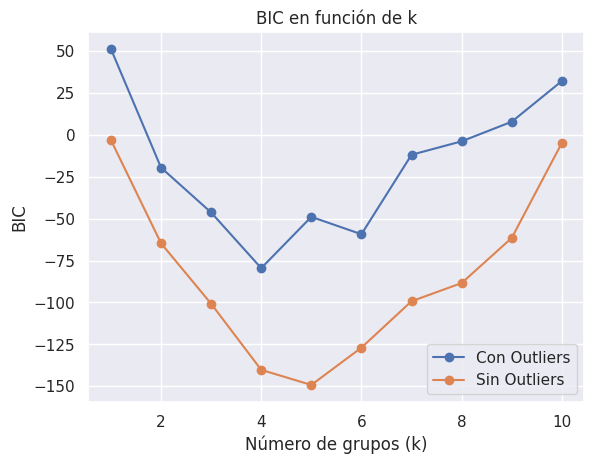



El valor óptimo de k que minimiza el BIC ( CON OUTLIERS ) es: 4


El valor óptimo de k que minimiza el BIC ( SIN OUTLIERS ) es: 5


In [166]:
# Determinar el valor de k (número de grupos)

# Optimizando la función BIC

# Función para calcular BIC para diferentes valores de k
def calcular_bic(data, max_k, random_state=42):
    valor_bic = []
    for k in range(1, max_k + 1):
        gmm = GaussianMixture(n_components=k, random_state=random_state)
        gmm.fit(data)
        bic = gmm.bic(data)
        valor_bic.append(bic)
    return valor_bic

# Calcular BIC para k entre 1 y 10
valor_bic = calcular_bic(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], max_k=10)
valor_bic_no_outliers = calcular_bic(df_no_outliers[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], max_k=10)

plt.plot(range(1, 11),valor_bic, marker='o', label='Con Outliers')
plt.plot(range(1, 11),valor_bic_no_outliers, marker='o', label='Sin Outliers')
plt.xlabel('Número de grupos (k)')
plt.ylabel('BIC')
plt.title('BIC en función de k')
plt.legend()
plt.show()

# Encontrar el valor óptimo de k que minimiza el BIC
k_optimo = np.argmin(valor_bic) + 1
k_optimo_sin_outliers = np.argmin(valor_bic_no_outliers) + 1

print("\n")
print(f'El valor óptimo de k que minimiza el BIC ( CON OUTLIERS ) es: {k_optimo}')
print("\n")
print(f'El valor óptimo de k que minimiza el BIC ( SIN OUTLIERS ) es: {k_optimo_sin_outliers}')


In [167]:
# Ejecución de análisis con los datos calculados (k y n_init) 

# Ejecutar K-means con k=5 y n_init=2
k = 5
n_init = 2

# K-means para el conjunto de datos con outliers
kmeans = KMeans(n_clusters=k, n_init=n_init, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# K-means para el conjunto de datos sin outliers
kmeans_no_outliers = KMeans(n_clusters=k, n_init=n_init, random_state=42)
df_no_outliers['Cluster'] = kmeans_no_outliers.fit_predict(df_no_outliers[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Ver los resultados
print("Conjunto de datos con outliers:")
print(df.head())

print("\nConjunto de datos sin outliers:")
print(df_no_outliers.head())

Conjunto de datos con outliers:
   Gender       Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0     1.0  0.019231            0.000000                0.387755        2
1     1.0  0.057692            0.000000                0.816327        4
2     0.0  0.038462            0.008197                0.051020        2
3     0.0  0.096154            0.008197                0.775510        4
4     0.0  0.250000            0.016393                0.397959        2

Conjunto de datos sin outliers:
   Gender       Age  Annual Income (k$)  Spending Score (1-100)  Cluster
1     1.0  0.057692            0.000000                0.816327        3
3     0.0  0.096154            0.008197                0.775510        3
4     0.0  0.250000            0.016393                0.397959        3
5     0.0  0.076923            0.016393                0.765306        3
6     0.0  0.326923            0.024590                0.051020        1


In [168]:
# Mostrar para el análisis anterior una tabla con los siguientes datos: número de grupo, cantidad#
# de observaciones de ese grupo y el centroide que representa a ese grupo(valor de cada variable)
# Crear una tabla de resumen para el conjunto de datos con outliers

# Tabla de resumen para los datos con outliers
tabla = pd.DataFrame(kmeans.cluster_centers_, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
tabla['Nº de grupo'] = range(1, k+1)
tabla['Nº de observaciones del grupo'] = df['Cluster'].value_counts().sort_index().values
tabla.set_index('Nº de grupo', inplace=True)

# Tabla de resumen para los datos sin outliers
tabla_sin_outliers = pd.DataFrame(kmeans_no_outliers.cluster_centers_, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
tabla_sin_outliers['Nº de grupo'] = range(1, k+1)
tabla_sin_outliers['Nº de observaciones del grupo'] = df_no_outliers['Cluster'].value_counts().sort_index().values
tabla_sin_outliers.set_index('Nº de grupo', inplace=True)

In [169]:
# Tabla con los datos con outliers
tabla

,Age,Annual Income (k$),Spending Score (1-100),Nº de observaciones del grupo
Nº de grupo,,,,
1,0.722149,0.274449,0.416080,58
2,0.286058,0.582787,0.821684,40
3,0.174254,0.303111,0.408580,49
4,0.500000,0.615847,0.172789,30
5,0.144649,0.092659,0.791482,23


In [170]:
# Tabla con los datos sin outliers
tabla_sin_outliers

,Age,Annual Income (k$),Spending Score (1-100),Nº de observaciones del grupo
Nº de grupo,,,,
1,0.287475,0.572089,0.821298,39
2,0.569838,0.100949,0.183673,19
3,0.460973,0.555448,0.206182,34
4,0.140421,0.217909,0.629380,53
5,0.730351,0.321810,0.490240,46


In [171]:
# Realiza una descripción semántica de los grupos
# Calcular la media y la mediana de cada característica por grupo
media_cluster = df.groupby('Cluster').mean()

mediana_cluster = df.groupby('Cluster').median()

# Mostrar la media y la mediana por grupo
print("Media por grupo:")
print(media_cluster)
print("\nMediana por grupo:")
print(mediana_cluster)


Media por grupo:
           Gender       Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                
0        0.431034  0.722149            0.274449                0.416080
1        0.450000  0.286058            0.582787                0.821684
2        0.408163  0.174254            0.303111                0.408580
3        0.533333  0.500000            0.615847                0.172789
4        0.391304  0.144649            0.092659                0.791482

Mediana por grupo:
         Gender       Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                              
0           0.0  0.682692            0.278689                0.459184
1           0.0  0.269231            0.520492                0.836735
2           0.0  0.153846            0.344262                0.418367
3           1.0  0.490385            0.590164                0.158163
4           0.0  0.115385            0.

<ipython-input-172-f4c3741f6b8c>:18: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 10


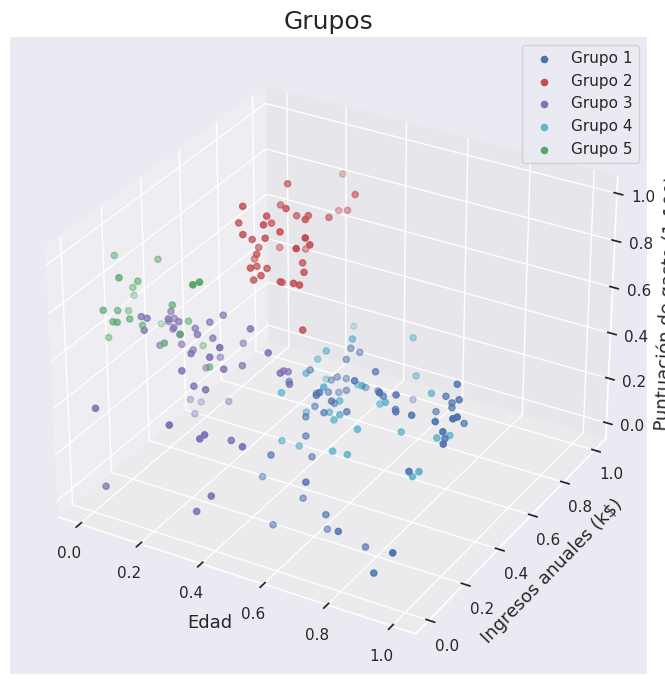

In [172]:
# Asignamos un color para cada grupo
colors = ['b', 'r', 'm', 'c', 'g']

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Dibujamos los puntos de los grupos
for cluster in range(k):
    datos = df[df['Cluster'] == cluster]
    ax.scatter(datos['Age'], datos['Annual Income (k$)'], datos['Spending Score (1-100)'], c=colors[cluster], marker='o', label=f'Grupo {cluster + 1}')

ax.set_title("Grupos", fontsize=18)
ax.set_xlabel("Edad", fontsize=13)
ax.set_ylabel("Ingresos anuales (k$)", fontsize=13)
ax.set_zlabel("Puntuación de gasto (1-100)", fontsize=13)


ax.dist = 10


ax.legend()
plt.tight_layout()  # Se ajusta automáticamente el espacio entre los subplots

plt.show()

Grupo 1: Este grupo tiene un promedio de edad relativamente bajo, con ingresos anuales medios y una puntuación de gasto alta. Estos podrían ser clientes jóvenes que tienen una disposición para gastar más en compras y actividades en el centro comercial.

Grupo 2: Este grupo tiene un promedio de edad más alto, con ingresos anuales medios y una puntuación de gasto medio-baja. Estos podrían ser clientes de mayor edad que tienen un enfoque más conservador en sus gastos en el centro comercial.

Grupo 3: Este grupo tiene un promedio de edad medio-alto, con ingresos anuales altos y una puntuación de gasto baja. Estos podrían ser clientes adinerados de edad avanzada que no gastan mucho en el centro comercial.

Grupo 4: Este grupo tiene un promedio de edad medio, con ingresos anuales bajos y una puntuación de gasto media. Estos podrían ser clientes con ingresos más bajos que aún están dispuestos a gastar una cantidad moderada en el centro comercial.

Grupo 5: Este grupo tiene un promedio de edad medio-bajo, con ingresos anuales altos y una puntuación de gasto alta. Estos podrían ser clientes jóvenes adinerados que están dispuestos a gastar en compras y actividades en el centro comercial.

# **2. SEGMENTACIÓN DE PAÍSES**
 * En el dataset se encuentran datos relativos a factores socioeconómicos y de salud quedeterminan el desarrollo de un país.
*  El objetivo es categorizar los países en base a esos factores socioeconómicos y de salud.

In [173]:
#Importación de librerías necesarias

import seaborn as sns # Creación de mapa de calor
import pandas as pd # Pandas para datset
import matplotlib.pyplot as plt # Necesario para reajustar el tamaño del heatMap o crear otros graficos
import pydot # Imagen del arbol de decisiones u otras imagenes
import numpy as np # Libreria numpy, util en python

from sklearn.preprocessing import MinMaxScaler # Escalamiento de características
from sklearn import preprocessing # Preprocesamiento de datos
from sklearn.cluster import KMeans # Algoritmo de clustering
from sklearn.mixture import GaussianMixture # Modelado probabilístico
from mpl_toolkits.mplot3d import Axes3D # Gráficos en 3D

df_paises= pd.read_csv('/content/drive/MyDrive/KMEANS/Country-data.csv') 

In [174]:
# Preprocesamiento y elección de variables relevantes para el estudio.
# Se deberá realizar un pequeño análisis estadístico y argumentar qué variables se eligen para el estudio
df_paises.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [175]:
df_paises.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [176]:
 # Codificamos las columnas con valores string reetiquetandolos con valores numericos, de esta manera podemos utilizar los modelos adecuadamente
le = preprocessing.LabelEncoder() 
df_paises['country'] = le.fit_transform(df_paises.country.values)


In [177]:
df_paises.describe()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.00000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,83.00000,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,48.35287,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,0.00000,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,41.50000,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,83.00000,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,124.50000,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,166.00000,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [178]:
# Variable irrelevante para nuestro estudio (columna)
df_paises = df_paises.drop('country', axis=1)

In [179]:
# Escalamiento y detección de outliers

# Argumentar si es necesario o no realizar escalamiento de las variables, y, si es necesario,
# escalarlas.

# Se debe escalar porque, porque por ejemplo tenemos el gdpp con valores mucho mas altos (en rangos enormes) que el resto de columnas (rangos mas pequeños), será mejor normalizar entre 0 y 1 para que no haya gran difrencia
scaler = MinMaxScaler()
scaler.fit(df_paises)

df_paises_scaled = scaler.transform(df_paises)

df= pd.DataFrame(df_paises_scaled, columns=df_paises.columns)

In [180]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,0.173661,0.205112,0.311106,0.269207,0.132933,0.110820,0.758495,0.283591,0.121536
std,0.196343,0.137135,0.170717,0.139188,0.154980,0.097687,0.175408,0.238777,0.174944
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.027507,0.118520,0.193288,0.173250,0.022076,0.055633,0.654832,0.101735,0.010490
50%,0.081305,0.174550,0.280298,0.248566,0.075174,0.088716,0.808679,0.198738,0.042274
75%,0.289679,0.256345,0.422001,0.337393,0.178397,0.138250,0.881657,0.430599,0.131900
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [181]:
# Detectar los outliers y eliminarlos

# Utilizando el método de Jacknife en el que ejecutaremos el algoritmo K-means
# eliminando una observación cada vez.
X = df.to_numpy()

N= X.shape[0]  # Numero de observaciones
K= 4 # Número de clusters

SSE = []

# Almacenaremos el índice SSE de cada una de las ejecuciones en un vector. Esa
# información se puede obtener con la variable inertia_ del modelo.

for i in range(0, N):
  X_sin_i = np.delete(X, i, axis=0)
  # Aplicamos K-medias a X_sin_i y obtenemos el indice SSE 
  kmeans = KMeans(n_clusters=K, n_init=10, random_state=100).fit(X_sin_i)
  SSE.append(kmeans.inertia_)

# Detección analítica de outliers
sigma = np.std(SSE) # Desviación típica de SSE
mu= np.mean(SSE) # Media

# Umbral: 2 para distribuciones normales
# Umbral: 3 para cualquier otra distribución
umbral = 2

outliers = []
for i in range(0, N):
  if np.abs(SSE[i]-mu) >  umbral*sigma:
    outliers.append(i)

for idx in outliers:
  print("Outlier encontrado en el indice: ", idx)
  print("Valor columna: ", df.iloc[idx, :])
  print("Valor SSE: ", SSE[idx] ,"\n")

# Eliminar outliers del DataFrame
df_no_outliers = df.drop(outliers)

Outlier encontrado en el indice:  66
Valor columna:  child_mort    1.000000
exports       0.075996
health        0.316967
imports       0.371601
income        0.007163
inflation     0.089271
life_expec    0.000000
total_fer     0.343849
gdpp          0.004114
Name: 66, dtype: float64
Valor SSE:  16.06111750105117 

Outlier encontrado en el indice:  91
Valor columna:  child_mort    0.000974
exports       0.874932
health        0.370416
imports       0.816022
income        0.732296
inflation     0.072359
life_expec    0.970414
total_fer     0.075710
gdpp          1.000000
Name: 91, dtype: float64
Valor SSE:  16.345688711447302 

Outlier encontrado en el indice:  93
Valor columna:  child_mort    0.290166
exports       0.124523
health        0.121815
imports       0.246841
income        0.006279
inflation     0.120137
life_expec    0.566075
total_fer     0.544164
gdpp          0.001737
Name: 93, dtype: float64
Valor SSE:  17.24132715327187 

Outlier encontrado en el indice:  102
Valor colu

In [182]:
# Ejecución de análisis cluster con un valor de k concreto (número de grupos), por ejemplo 4, y
# determinar el número de réplicas (n_init) del algoritmo que conduce a que la repetición de
# dicho algoritmo genere la misma solución.

def comparar_n_init(data, K, max_init, random_state=42):
    for n_init  in range(1, max_init + 1):
        kmeans = KMeans(n_clusters=K, n_init=n_init, random_state=random_state).fit(data)
        print(f'N_init: {n_init }, inertia: {kmeans.inertia_}')
        
        # Comprobar si se obtuvo la misma solución en dos réplicas consecutivas
        if n_init  > 1 and np.array_equal(etiquetas_anteriores, kmeans.labels_) and np.isclose(inercia_anterior, kmeans.inertia_):
            print(f"Se obtuvo la misma solución con n_init = {n_init }.")
            break
        
        etiquetas_anteriores = kmeans.labels_
        inercia_anterior = kmeans.inertia_

# Ejecutar la función con un máximo de 20 réplicas
K = 4  # Número de clusters deseado
data_con_outliers = df[['child_mort', 'exports', 'health','imports','income','inflation','life_expec','total_fer','gdpp']]
data_sin_outliers = df_no_outliers[['child_mort', 'exports', 'health','imports','income','inflation','life_expec','total_fer','gdpp']]

# Ejecutar la función con un máximo de 20 réplicas
# Te hace un break, si ves que es el mismo, para no hacerte las 20
print('------- DATOS CON OUTLIERS ------')
comparar_n_init(data_con_outliers, K, max_init=20)
print('\n')
print('------- DATOS SIN OUTLIERS ------')
comparar_n_init(data_sin_outliers, K, max_init=20)

------- DATOS CON OUTLIERS ------
N_init: 1, inertia: 17.91783103127293
N_init: 2, inertia: 17.496716275245433
N_init: 3, inertia: 17.496716275245433
Se obtuvo la misma solución con n_init = 3.


------- DATOS SIN OUTLIERS ------
N_init: 1, inertia: 12.253331124125957
N_init: 2, inertia: 12.253331124125957
Se obtuvo la misma solución con n_init = 2.


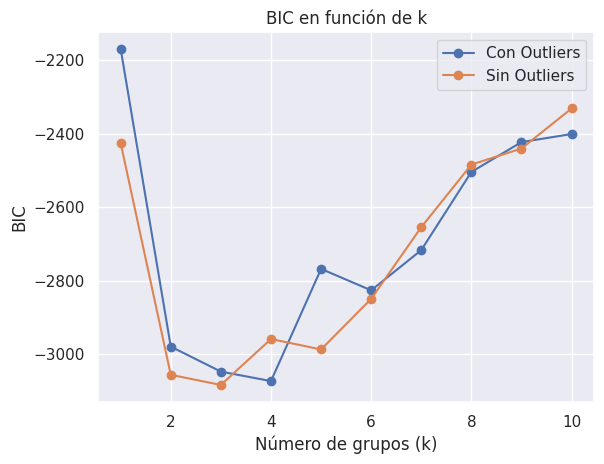



El valor óptimo de k que minimiza el BIC ( CON OUTLIERS ) es: 4


El valor óptimo de k que minimiza el BIC ( SIN OUTLIERS ) es: 3


In [183]:
# Determinar el valor de k (número de grupos)

# Optimizando la función BIC

# Función para calcular BIC para diferentes valores de k
def calcular_bic(data, max_k, random_state=42):
    valor_bic = []
    for k in range(1, max_k + 1):
        gmm = GaussianMixture(n_components=k, random_state=random_state)
        gmm.fit(data)
        bic = gmm.bic(data)
        valor_bic.append(bic)
    return valor_bic

# Calcular BIC para k entre 1 y 10
valor_bic = calcular_bic(df[['child_mort', 'exports', 'health','imports','income','inflation','life_expec','total_fer','gdpp']], max_k=10)
valor_bic_no_outliers = calcular_bic(df_no_outliers[['child_mort', 'exports', 'health','imports','income','inflation','life_expec','total_fer','gdpp']], max_k=10)

plt.plot(range(1, 11),valor_bic, marker='o', label='Con Outliers')
plt.plot(range(1, 11),valor_bic_no_outliers, marker='o', label='Sin Outliers')
plt.xlabel('Número de grupos (k)')
plt.ylabel('BIC')
plt.title('BIC en función de k')
plt.legend()
plt.show()

# Encontrar el valor óptimo de k que minimiza el BIC
k_optimo = np.argmin(valor_bic) + 1
k_optimo_sin_outliers = np.argmin(valor_bic_no_outliers) + 1

print("\n")
print(f'El valor óptimo de k que minimiza el BIC ( CON OUTLIERS ) es: {k_optimo}')
print("\n")
print(f'El valor óptimo de k que minimiza el BIC ( SIN OUTLIERS ) es: {k_optimo_sin_outliers}')


In [184]:
# Ejecución de análisis con los datos calculados (k y n_init) 

# Ejecutar K-means con k=3 y n_init=2
k = 3
n_init = 2

# K-means para el conjunto de datos con outliers
kmeans = KMeans(n_clusters=k, n_init=n_init, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['child_mort', 'exports', 'health','imports','income','inflation','life_expec','total_fer','gdpp']])

# K-means para el conjunto de datos sin outliers
kmeans_no_outliers = KMeans(n_clusters=k, n_init=n_init, random_state=42)
df_no_outliers['Cluster'] = kmeans_no_outliers.fit_predict(df_no_outliers[['child_mort', 'exports', 'health','imports','income','inflation','life_expec','total_fer','gdpp']])

# Ver los resultados
print("Conjunto de datos con outliers:")
print(df.head())

print("\nConjunto de datos sin outliers:")
print(df_no_outliers.head())

Conjunto de datos con outliers:
   child_mort   exports    health   imports    income  inflation  life_expec  \
0    0.426485  0.049482  0.358608  0.257765  0.008047   0.126144    0.475345   
1    0.068160  0.139531  0.294593  0.279037  0.074933   0.080399    0.871795   
2    0.120253  0.191559  0.146675  0.180149  0.098809   0.187691    0.875740   
3    0.566699  0.311125  0.064636  0.246266  0.042535   0.245911    0.552268   
4    0.037488  0.227079  0.262275  0.338255  0.148652   0.052213    0.881657   

   total_fer      gdpp  Cluster  
0   0.736593  0.003073        1  
1   0.078864  0.036833        0  
2   0.274448  0.040365        0  
3   0.790221  0.031488        1  
4   0.154574  0.114242        0  

Conjunto de datos sin outliers:
   child_mort   exports    health   imports    income  inflation  life_expec  \
0    0.426485  0.049482  0.358608  0.257765  0.008047   0.126144    0.475345   
1    0.068160  0.139531  0.294593  0.279037  0.074933   0.080399    0.871795   
2    0.120

In [185]:
# Mostrar para el análisis anterior una tabla con los siguientes datos: número de grupo, cantidad#
# de observaciones de ese grupo y el centroide que representa a ese grupo(valor de cada variable)
# Crear una tabla de resumen para el conjunto de datos con outliers

# Tabla de resumen para los datos con outliers
tabla = pd.DataFrame(kmeans.cluster_centers_, columns=['child_mort', 'exports', 'health','imports','income','inflation','life_expec','total_fer','gdpp'])
tabla['Nº de grupo'] = range(1, k+1)
tabla['Nº de observaciones del grupo'] = df['Cluster'].value_counts().sort_index().values
tabla.set_index('Nº de grupo', inplace=True)

# Tabla de resumen para los datos sin outliers
tabla_sin_outliers = pd.DataFrame(kmeans_no_outliers.cluster_centers_, columns=['child_mort', 'exports', 'health','imports','income','inflation','life_expec','total_fer','gdpp'])
tabla_sin_outliers['Nº de grupo'] = range(1, k+1)
tabla_sin_outliers['Nº de observaciones del grupo'] = df_no_outliers['Cluster'].value_counts().sort_index().values
tabla_sin_outliers.set_index('Nº de grupo', inplace=True)

In [186]:
# Tabla con los datos con outliers
tabla

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Nº de observaciones del grupo
Nº de grupo,,,,,,,,,,
1,0.096839,0.201990,0.275476,0.271713,0.096755,0.109138,0.796005,0.183854,0.061339,87
2,0.448556,0.143746,0.278392,0.243711,0.023687,0.151784,0.537322,0.624465,0.014068,45
3,0.011184,0.291771,0.441730,0.295760,0.363321,0.062333,0.949620,0.093240,0.409340,35


In [187]:
# Tabla con los datos sin outliers
tabla_sin_outliers

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Nº de observaciones del grupo
Nº de grupo,,,,,,,,,,
1,0.430994,0.150681,0.280121,0.251030,0.024272,0.134755,0.547525,0.629300,0.014622,42
2,0.012187,0.254344,0.447949,0.267485,0.318630,0.061015,0.944896,0.094736,0.375650,32
3,0.097325,0.201868,0.268512,0.267509,0.097649,0.109719,0.798864,0.183059,0.060095,84


In [188]:
# Realiza una descripción semántica de los grupos
# Calcular la media y la mediana de cada característica por grupo
media_cluster = df.groupby('Cluster').mean()

mediana_cluster = df.groupby('Cluster').median()

# Mostrar la media y la mediana por grupo
print("Media por grupo:")
print(media_cluster)
print("\nMediana por grupo:")
print(mediana_cluster)


Media por grupo:
         child_mort   exports    health   imports    income  inflation  \
Cluster                                                                  
0          0.096839  0.201990  0.275476  0.271713  0.096755   0.109138   
1          0.448556  0.143746  0.278392  0.243711  0.023687   0.151784   
2          0.011184  0.291771  0.441730  0.295760  0.363321   0.062333   

         life_expec  total_fer      gdpp  
Cluster                                   
0          0.796005   0.183854  0.061339  
1          0.537322   0.624465  0.014068  
2          0.949620   0.093240  0.409340  

Mediana por grupo:
         child_mort   exports    health   imports    income  inflation  \
Cluster                                                                  
0          0.077897  0.187557  0.259167  0.279612  0.079515   0.094261   
1          0.426972  0.118520  0.216905  0.231318  0.009977   0.123926   
2          0.007790  0.250592  0.476694  0.214645  0.319886   0.049626   

      

<ipython-input-189-ace2a533d1d8>:18: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 11


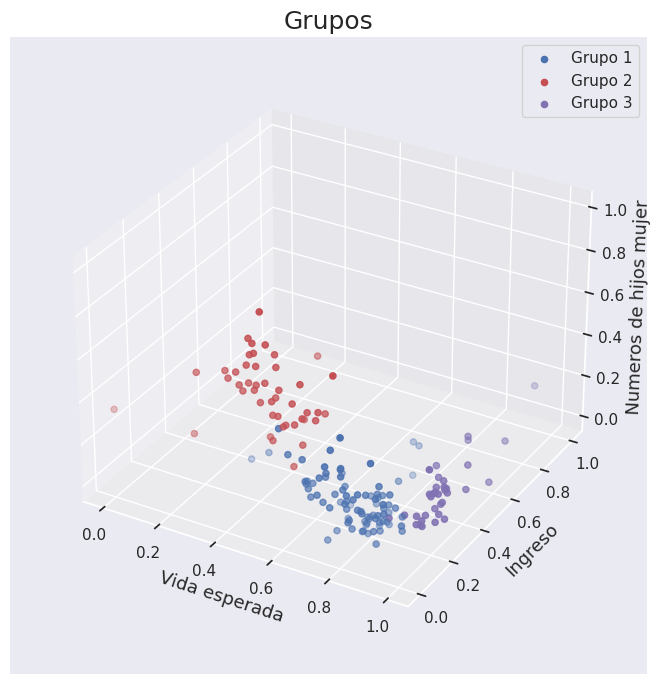

In [189]:
# Asignamos un color para cada grupo
colors = ['b', 'r', 'm', 'c', 'g']

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Dibujamos los puntos de los grupos
for cluster in range(k):
    datos = df[df['Cluster'] == cluster]
    ax.scatter(datos['life_expec'], datos['income'], datos['total_fer'], c=colors[cluster], marker='o', label=f'Grupo {cluster + 1}')

ax.set_title("Grupos", fontsize=18)
ax.set_xlabel("Vida esperada", fontsize=13)
ax.set_ylabel("Ingreso", fontsize=13)
ax.set_zlabel("Numeros de hijos mujer", fontsize=13)


ax.dist = 11

ax.legend()
plt.tight_layout()  # Se ajusta automáticamente el espacio entre los subplots

plt.show()

# **3. SEGMENTACIÓN DE JUGADORES**
* Este dataset contiene datos sobre el comportamiento de una serie de jugadores de Call of
Duty. Por ejemplo, número de victorias, nivel del jugador, derrotas, prestigio, hits, etc.
* El objetivo es categorizar a estos jugadores (separarlos en grupos o clusters) según esos
datos.

In [190]:
#Importación de librerías necesarias

import seaborn as sns # Creación de mapa de calor
import pandas as pd # Pandas para datset
import matplotlib.pyplot as plt # Necesario para reajustar el tamaño del heatMap o crear otros graficos
import pydot # Imagen del arbol de decisiones u otras imagenes
import numpy as np # Libreria numpy, util en python

from sklearn.preprocessing import MinMaxScaler # Escalamiento de características
from sklearn import preprocessing # Preprocesamiento de datos
from sklearn.cluster import KMeans # Algoritmo de clustering
from sklearn.mixture import GaussianMixture # Modelado probabilístico
from mpl_toolkits.mplot3d import Axes3D # Gráficos en 3D

df_cod = pd.read_csv('/content/drive/MyDrive/KMEANS/cod.csv') 

In [191]:
# Preprocesamiento y elección de variables relevantes para el estudio.
# Se deberá realizar un pequeño análisis estadístico y argumentar qué variables se eligen para el estudio
df_cod.head()

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
0,RggRt45#4697369,0,0,0.00000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1,JohniceRex#9176033,0,0,0.00000,0,1,0,110,0,7,0,7.0,0,0,0,700,0.0,0,16
2,bootybootykill#1892064,0,66,1.03125,0,9,0,110,0,32,16,32.0,0,1,0,48300,0.0,0,64
3,JNaCo#5244172,3,2,0.40000,0,1,0,0,0,3,0,3.0,0,0,0,1150,0.0,0,5
4,gomezyayo_007#6596687,0,2,0.20000,0,1,0,110,0,5,1,5.0,0,0,0,1000,0.0,0,10


In [192]:
df_cod.tail()

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
1553,ImranePROPG#2085215,0,51,0.432203,0,10,0,110,0,71,11,71.0,0,0,0,49935,0.0,0,118
1554,Miguel_mor#1492856,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1555,Trianthor#3462590,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1556,tinytrex594#3976133,0,0,0.000000,0,1,0,0,2,1,0,1.0,0,1,7,0,91.2,9,0
1557,TomasFJ_05#2711069,1,35,0.686275,3,5,1,110,17,10,6,10.0,1,11,63,17126,39.0,80,51


In [193]:
# Variable (columna) no interesante en nuestro estudio
df_cod = df_cod.drop('name', axis=1)
df_cod = df_cod.drop('shots', axis=1)
df_cod = df_cod.drop('xp', axis=1)
df_cod = df_cod.drop('misses', axis=1)

In [194]:
df_cod.describe()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,scorePerMinute,deaths
count,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000
mean,153.002567,3753.001926,0.637098,6.895379,44.414634,4.998074,47.657253,10330.189987,425.915918,630.672657,21.428416,116.695764,685.797176,107.868825,3875.397946
std,301.984766,7929.696675,0.430459,10.184677,68.318064,7.005778,51.626213,22954.104384,786.182499,1305.150393,82.640000,256.354836,1518.383825,116.526676,7992.666443
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,0.261442,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.000000,14.000000
50%,10.000000,191.500000,0.732837,5.000000,11.000000,2.000000,14.000000,214.500000,51.000000,32.000000,3.031116,3.000000,36.500000,56.793995,269.000000
75%,168.000000,3445.750000,0.955293,12.000000,51.000000,8.000000,110.000000,9015.500000,485.500000,602.750000,9.085714,110.500000,609.750000,221.648976,3698.750000
max,3519.000000,66935.000000,3.000000,235.000000,435.000000,80.000000,117.000000,209851.000000,7479.000000,11719.000000,1349.000000,3745.000000,14531.000000,413.800000,67888.000000


In [195]:
# Escalamiento y detección de outliers

# Argumentar si es necesario o no realizar escalamiento de las variables, y, si es necesario,
# escalarlas.
# Se debe escalar porque, la edad es entre 0-100, y el dinero es 0 y 1000, mejor normalizar entre 0 y 1 para que no haya una gran difenrecia
scaler = MinMaxScaler()
scaler.fit(df_cod)

df_cod_scaled = scaler.transform(df_cod)

df= pd.DataFrame(df_cod_scaled, columns=df_cod.columns)

In [196]:
df.describe()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,scorePerMinute,deaths
count,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000
mean,0.043479,0.056069,0.212366,0.029342,0.100034,0.062476,0.407327,0.049226,0.056948,0.053816,0.015885,0.031160,0.047195,0.260679,0.057085
std,0.085816,0.118469,0.143486,0.043339,0.157415,0.087572,0.441250,0.109383,0.105119,0.111370,0.061260,0.068453,0.104493,0.281601,0.117733
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000060,0.087147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000535,0.000085,0.001483,0.000000,0.000000,0.000000,0.000206
50%,0.002842,0.002861,0.244279,0.021277,0.023041,0.025000,0.119658,0.001022,0.006819,0.002731,0.002247,0.000801,0.002512,0.137250,0.003962
75%,0.047741,0.051479,0.318431,0.051064,0.115207,0.100000,0.940171,0.042961,0.064915,0.051434,0.006735,0.029506,0.041962,0.535643,0.054483
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [197]:
# Detectar los outliers y eliminarlos

# Utilizando el método de Jacknife en el que ejecutaremos el algoritmo K-means
# eliminando una observación cada vez.
X = df.to_numpy()

N= X.shape[0]  # Numero de observaciones
K= 4 # Número de clusters

SSE = []

# Almacenaremos el índice SSE de cada una de las ejecuciones en un vector. Esa
# información se puede obtener con la variable inertia_ del modelo.

for i in range(0, N):
  X_sin_i = np.delete(X, i, axis=0)
  # Aplicamos K-medias a X_sin_i y obtenemos el indice SSE 
  kmeans = KMeans(n_clusters=K, n_init=10, random_state=100).fit(X_sin_i)
  SSE.append(kmeans.inertia_)

# Detección analítica de outliers
sigma = np.std(SSE) # Desviación típica de SSE
mu= np.mean(SSE) # Media

# Umbral: 2 para distribuciones normales
# Umbral: 3 para cualquier otra distribución
umbral = 2

outliers = []
for i in range(0, N):
  if np.abs(SSE[i]-mu) >  umbral*sigma:
    outliers.append(i)

for idx in outliers:
  print("Outlier encontrado en el indice: ", idx)
  print("Valor columna: ", df.iloc[idx, :])
  print("Valor SSE: ", SSE[idx] ,"\n")

# Eliminar outliers del DataFrame
df_no_outliers = df.drop(outliers)

Outlier encontrado en el indice:  135
Valor columna:  wins              0.263427
kills             0.581519
kdRatio           0.273941
killstreak        0.046809
level             0.525346
losses            0.212500
prestige          0.435897
hits              0.653797
timePlayed        0.288408
headshots         0.548084
averageTime       0.001546
gamesPlayed       0.276101
assists           0.772762
scorePerMinute    0.653375
deaths            0.697664
Name: 135, dtype: float64
Valor SSE:  150.0599737670963 

Outlier encontrado en el indice:  143
Valor columna:  wins              0.170503
kills             0.311974
kdRatio           0.375947
killstreak        0.076596
level             0.345622
losses            0.125000
prestige          0.153846
hits              0.327995
timePlayed        0.167268
headshots         0.393976
averageTime       0.001801
gamesPlayed       0.137517
assists           0.280366
scorePerMinute    0.792074
deaths            0.272729
Name: 143, dtype: float6

In [198]:
# Ejecución de análisis cluster con un valor de k concreto (número de grupos), por ejemplo 4, y
# determinar el número de réplicas (n_init) del algoritmo que conduce a que la repetición de
# dicho algoritmo genere la misma solución.

def comparar_n_init(data, K, max_init, random_state=42):
    for n_init  in range(1, max_init + 1):
        kmeans = KMeans(n_clusters=K, n_init=n_init, random_state=random_state).fit(data)
        print(f'N_init: {n_init }, inertia: {kmeans.inertia_}')
        
        # Comprobar si se obtuvo la misma solución en dos réplicas consecutivas
        if n_init  > 1 and np.array_equal(etiquetas_anteriores, kmeans.labels_) and np.isclose(inercia_anterior, kmeans.inertia_):
            print(f"Se obtuvo la misma solución con n_init = {n_init }.")
            break
        
        etiquetas_anteriores = kmeans.labels_
        inercia_anterior = kmeans.inertia_

# Ejecutar la función con un máximo de 20 réplicas
K = 4  # Número de clusters deseado
data_con_outliers = df[['wins', 'kills', 'kdRatio', 'killstreak', 'level', 'losses', 'prestige', 'hits', 'timePlayed', 'headshots', 'averageTime', 'gamesPlayed', 'assists', 'scorePerMinute', 'deaths']]
data_sin_outliers = df_no_outliers[['wins', 'kills', 'kdRatio', 'killstreak', 'level', 'losses', 'prestige', 'hits', 'timePlayed', 'headshots', 'averageTime', 'gamesPlayed', 'assists', 'scorePerMinute', 'deaths']]

# Ejecutar la función con un máximo de 20 réplicas
# Te hace un break, si ves que es el mismo, para no hacerte las 20
print('------- DATOS CON OUTLIERS ------')
comparar_n_init(data_con_outliers, K, max_init=20)
print('\n')
print('------- DATOS SIN OUTLIERS ------')
comparar_n_init(data_sin_outliers, K, max_init=20)

------- DATOS CON OUTLIERS ------
N_init: 1, inertia: 150.8939572977501
N_init: 2, inertia: 150.8939572977501
Se obtuvo la misma solución con n_init = 2.


------- DATOS SIN OUTLIERS ------
N_init: 1, inertia: 114.9179776280108
N_init: 2, inertia: 114.9179776280108
Se obtuvo la misma solución con n_init = 2.


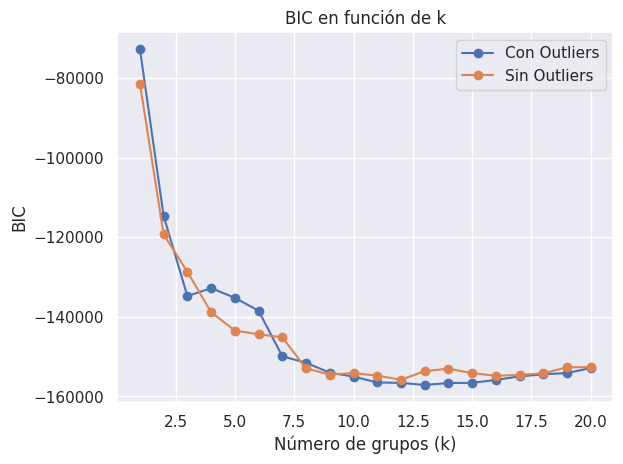



El valor óptimo de k que minimiza el BIC ( CON OUTLIERS ) es: 13


El valor óptimo de k que minimiza el BIC ( SIN OUTLIERS ) es: 12


In [199]:
# Determinar el valor de k (número de grupos)

# Optimizando la función BIC

# Función para calcular BIC para diferentes valores de k
def calcular_bic(data, max_k, random_state=42):
    valor_bic = []
    for k in range(1, max_k + 1):
        gmm = GaussianMixture(n_components=k, random_state=random_state)
        gmm.fit(data)
        bic = gmm.bic(data)
        valor_bic.append(bic)
    return valor_bic

# Calcular BIC para k entre 1 y 10 (hemos puesto 12 para verlo claro)
valor_bic = calcular_bic(df[['wins', 'kills', 'kdRatio', 'killstreak', 'level', 'losses', 'prestige', 'hits', 'timePlayed', 'headshots', 'averageTime', 'gamesPlayed', 'assists', 'scorePerMinute', 'deaths']], max_k=20)
valor_bic_no_outliers = calcular_bic(df_no_outliers[['wins', 'kills', 'kdRatio', 'killstreak', 'level', 'losses', 'prestige', 'hits', 'timePlayed', 'headshots', 'averageTime', 'gamesPlayed', 'assists', 'scorePerMinute', 'deaths']], max_k=20)

plt.plot(range(1, 21),valor_bic, marker='o', label='Con Outliers')
plt.plot(range(1, 21),valor_bic_no_outliers, marker='o', label='Sin Outliers')
plt.xlabel('Número de grupos (k)')
plt.ylabel('BIC')
plt.title('BIC en función de k')
plt.legend()
plt.show()

# Encontrar el valor óptimo de k que minimiza el BIC
k_optimo = np.argmin(valor_bic) + 1
k_optimo_sin_outliers = np.argmin(valor_bic_no_outliers) + 1

print("\n")
print(f'El valor óptimo de k que minimiza el BIC ( CON OUTLIERS ) es: {k_optimo}')
print("\n")
print(f'El valor óptimo de k que minimiza el BIC ( SIN OUTLIERS ) es: {k_optimo_sin_outliers}')


In [200]:
# Ejecución de análisis con los datos calculados (k y n_init) 

# Ejecutar K-means con k=12 y n_init=2
k = 12
n_init = 2

# K-means para el conjunto de datos con outliers
kmeans = KMeans(n_clusters=k, n_init=n_init, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['wins', 'kills', 'kdRatio', 'killstreak', 'level', 'losses', 'prestige', 'hits', 'timePlayed', 'headshots', 'averageTime', 'gamesPlayed', 'assists', 'scorePerMinute', 'deaths']])

# K-means para el conjunto de datos sin outliers
kmeans_no_outliers = KMeans(n_clusters=k, n_init=n_init, random_state=42)
df_no_outliers['Cluster'] = kmeans_no_outliers.fit_predict(df_no_outliers[['wins', 'kills', 'kdRatio', 'killstreak', 'level', 'losses', 'prestige', 'hits', 'timePlayed', 'headshots', 'averageTime', 'gamesPlayed', 'assists', 'scorePerMinute', 'deaths']])

# Ver los resultados
print("Conjunto de datos con outliers:")
print(df.head())

print("\nConjunto de datos sin outliers:")
print(df_no_outliers.head())

Conjunto de datos con outliers:
       wins     kills   kdRatio  killstreak     level  losses  prestige  hits  \
0  0.000000  0.000000  0.000000         0.0  0.000000     0.0  0.000000   0.0   
1  0.000000  0.000000  0.000000         0.0  0.000000     0.0  0.940171   0.0   
2  0.000000  0.000986  0.343750         0.0  0.018433     0.0  0.940171   0.0   
3  0.000853  0.000030  0.133333         0.0  0.000000     0.0  0.000000   0.0   
4  0.000000  0.000030  0.066667         0.0  0.000000     0.0  0.940171   0.0   

   timePlayed  headshots  averageTime  gamesPlayed   assists  scorePerMinute  \
0    0.000000   0.000000     0.000000          0.0  0.000000             0.0   
1    0.000936   0.000000     0.005189          0.0  0.000000             0.0   
2    0.004279   0.001365     0.023721          0.0  0.000069             0.0   
3    0.000401   0.000000     0.002224          0.0  0.000000             0.0   
4    0.000669   0.000085     0.003706          0.0  0.000000             0.0   



In [201]:
# Mostrar para el análisis anterior una tabla con los siguientes datos: número de grupo, cantidad#
# de observaciones de ese grupo y el centroide que representa a ese grupo(valor de cada variable)
# Crear una tabla de resumen para el conjunto de datos con outliers

# Tabla de resumen para los datos con outliers
tabla = pd.DataFrame(kmeans.cluster_centers_, columns=['wins', 'kills', 'kdRatio', 'killstreak', 'level', 'losses', 'prestige', 'hits', 'timePlayed', 'headshots', 'averageTime', 'gamesPlayed', 'assists', 'scorePerMinute', 'deaths'])
tabla['Nº de grupo'] = range(1, k+1)
tabla['Nº de observaciones del grupo'] = df['Cluster'].value_counts().sort_index().values
tabla.set_index('Nº de grupo', inplace=True)

# Tabla de resumen para los datos sin outliers
tabla_sin_outliers = pd.DataFrame(kmeans_no_outliers.cluster_centers_, columns=['wins', 'kills', 'kdRatio', 'killstreak', 'level', 'losses', 'prestige', 'hits', 'timePlayed', 'headshots', 'averageTime', 'gamesPlayed', 'assists', 'scorePerMinute', 'deaths'])
tabla_sin_outliers['Nº de grupo'] = range(1, k+1)
tabla_sin_outliers['Nº de observaciones del grupo'] = df_no_outliers['Cluster'].value_counts().sort_index().values
tabla_sin_outliers.set_index('Nº de grupo', inplace=True)

In [202]:
# Tabla con los datos con outliers
tabla

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,scorePerMinute,deaths,Nº de observaciones del grupo
Nº de grupo,,,,,,,,,,,,,,,,
1,0.189232,0.287396,0.344853,0.080980,0.352255,0.209091,0.303807,0.255425,0.200424,0.275975,0.001769,0.170797,0.240287,0.604873,0.287194,33
2,0.012076,0.011280,0.270411,0.034697,0.031313,0.055983,0.051501,0.011705,0.012189,0.011493,0.002611,0.008084,0.011074,0.416640,0.012005,117
3,0.008252,0.007091,0.207943,0.011889,0.051994,0.025562,0.935945,0.002859,0.024683,0.007671,0.063929,0.001899,0.006263,0.031314,0.008544,267
4,0.007182,0.002570,0.272885,0.009846,0.021430,0.012663,0.056868,0.001328,0.007731,0.002716,0.018710,0.000836,0.001290,0.039325,0.003023,153
5,0.142964,0.182419,0.319392,0.075687,0.284756,0.178652,0.932776,0.166615,0.164893,0.172264,0.002262,0.112816,0.150705,0.489225,0.188810,89
6,0.275003,0.391368,0.341303,0.093692,0.502991,0.222149,0.939121,0.337772,0.336620,0.356081,0.002531,0.210728,0.331891,0.453661,0.381996,57
7,0.434732,0.705861,0.337220,0.086608,0.663052,0.201471,0.849673,0.659610,0.525463,0.641306,0.002218,0.373235,0.634489,0.515090,0.699489,17
8,0.000446,0.000056,0.025413,0.000298,0.001192,0.000438,0.006497,0.000006,0.000673,0.000057,0.003641,0.000008,0.000013,0.007854,0.000189,371
9,0.041854,0.043764,0.287155,0.047416,0.085873,0.096744,0.934138,0.044234,0.047386,0.042835,0.002677,0.030003,0.040193,0.495569,0.047947,119


In [203]:
# Tabla con los datos sin outliers
tabla_sin_outliers

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,scorePerMinute,deaths,Nº de observaciones del grupo
Nº de grupo,,,,,,,,,,,,,,,,
1,0.272910,0.434088,0.337383,0.076596,0.496043,0.191304,0.879599,0.379303,0.328965,0.391803,0.002178,0.228554,0.364797,0.506840,0.426961,46
2,0.007157,0.002422,0.262741,0.009406,0.020813,0.012089,0.055106,0.001195,0.007546,0.002557,0.018878,0.000761,0.001160,0.036181,0.002878,152
3,0.006602,0.005099,0.200586,0.010026,0.040258,0.022200,0.935179,0.001988,0.018892,0.005556,0.050229,0.001336,0.004816,0.028448,0.006492,250
4,0.009563,0.009476,0.232427,0.031822,0.025283,0.055163,0.030844,0.010619,0.009160,0.009056,0.001889,0.007590,0.009202,0.689648,0.012295,184
5,0.037710,0.039602,0.283123,0.046649,0.077652,0.092523,0.940970,0.040867,0.042660,0.038428,0.002633,0.027758,0.036099,0.505094,0.044075,107
6,0.105804,0.141637,0.332288,0.065710,0.212517,0.156105,0.417412,0.141773,0.110265,0.137142,0.001873,0.092166,0.125166,0.592196,0.142199,43
7,0.133754,0.160076,0.305790,0.062540,0.246264,0.170455,0.930717,0.142523,0.141013,0.151483,0.002101,0.103795,0.130192,0.534040,0.173744,66
8,0.012236,0.009923,0.248170,0.032119,0.029710,0.051563,0.057281,0.010073,0.012171,0.009690,0.002821,0.007389,0.009864,0.386289,0.011126,104
9,0.203578,0.253842,0.346331,0.078348,0.444746,0.215686,0.931624,0.214918,0.278922,0.237531,0.003449,0.138957,0.213874,0.343023,0.244904,51


In [204]:
# Realiza una descripción semántica de los grupos
# Calcular la media y la mediana de cada característica por grupo
media_cluster = df.groupby('Cluster').mean()

mediana_cluster = df.groupby('Cluster').median()

# Mostrar la media y la mediana por grupo
print("Media por grupo:")
print(media_cluster)
print("\nMediana por grupo:")
print(mediana_cluster)


Media por grupo:
             wins     kills   kdRatio  killstreak     level    losses  \
Cluster                                                                 
0        0.189232  0.287396  0.344853    0.080980  0.352255  0.209091   
1        0.012076  0.011280  0.270411    0.034697  0.031313  0.055983   
2        0.008252  0.007091  0.207943    0.011889  0.051994  0.025562   
3        0.007182  0.002570  0.272885    0.009846  0.021430  0.012663   
4        0.142964  0.182419  0.319392    0.075687  0.284756  0.178652   
5        0.275003  0.391368  0.341303    0.093692  0.502991  0.222149   
6        0.434732  0.705861  0.337220    0.086608  0.663052  0.201471   
7        0.000446  0.000056  0.025413    0.000298  0.001192  0.000438   
8        0.041854  0.043764  0.287155    0.047416  0.085873  0.096744   
9        0.072926  0.094212  0.324928    0.060811  0.141839  0.145640   
10       0.010470  0.010596  0.228004    0.031842  0.026498  0.057399   
11       0.103355  0.113976  0.343

In [205]:
# OPTAMOS POR NO ENSEÑAR LA GRÁFICA YA QUE HAY DEMASIADOS GRUPOS